In [1]:
import pandas as pd
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs=pd.DataFrame(job_data)
df_companies=pd.DataFrame(company_data)

In [5]:

df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [6]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [7]:
df_jobs.merge(df_companies,on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [8]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df_IN=df[df['job_country']=='India'].copy()
df_IN['job_posted_month']=df_IN['job_posted_date'].dt.strftime('%B')
df_IN_pivot=df_IN.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_IN_pivot.reset_index(inplace=True) 
df_IN_pivot['month_no']=pd.to_datetime(df_IN_pivot['job_posted_month'],format='%B').dt.month

df_IN_pivot.sort_values('month_no',inplace=True)
df_IN_pivot.set_index('job_posted_month',inplace=True)
df_IN_pivot.drop(columns='month_no',inplace=True)
df_IN_pivot

c:\Users\mesne\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [10]:
df_IN_software_pivot=pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')
df_IN_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [17]:
df_IN_merged=df_IN_pivot.merge(df_IN_software_pivot,on='job_posted_month')
df_IN_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094


In [32]:
top5=(df_IN_merged
       .sum()
       .sort_values(ascending=False)
       .head(5)
       .index
       .to_list())         #putting a bracket like that allows to break the code into multiple lines
top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

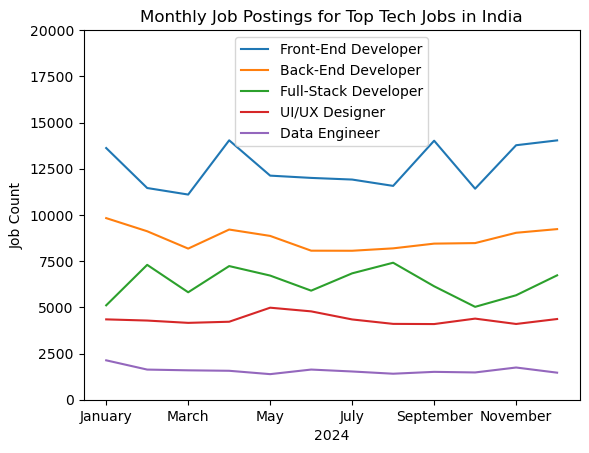

In [41]:
df_IN_merged[top5].plot(kind='line')
plt.xlabel("2024")
plt.ylabel("Job Count")
plt.title("Monthly Job Postings for Top Tech Jobs in India")
plt.ylim(0,20000)
plt.legend()
plt.show()
